In [27]:
import yfinance as yf
import os
import pandas as pd

In [28]:
btc_ticker = yf.Ticker('BTC-USD')

In [29]:
btc = btc_ticker.history(period='max')

In [30]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-29 00:00:00+00:00,62499.183594,63585.644531,60498.730469,61198.382812,65496611844,0.0,0.0
2024-03-01 00:00:00+00:00,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,0.0,0.0
2024-03-02 00:00:00+00:00,62431.652344,62458.699219,61657.289062,62029.847656,23888473685,0.0,0.0


In [19]:
btc.index = pd.to_datetime(btc.index)

In [7]:
del btc['Dividends']
del btc['Stock Splits']

In [8]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-02-29 00:00:00+00:00,62499.183594,63585.644531,60498.730469,61198.382812,65496611844
2024-03-01 00:00:00+00:00,61168.062500,63155.101562,60802.527344,62440.632812,40186368423
2024-03-02 00:00:00+00:00,62431.652344,62458.699219,61657.289062,62029.847656,23888473685


In [10]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

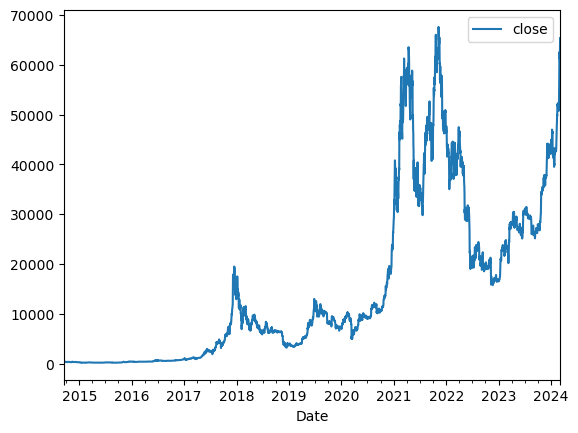

In [11]:
btc.plot.line(y='close', use_index=True)

In [12]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates=True)

In [13]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-02-29,1.333333,-0.116355,0.251587
2024-03-01,1.333333,-0.116355,0.251587
2024-03-02,1.333333,-0.116355,0.251587
2024-03-03,1.333333,-0.116355,0.251587


In [36]:
btc = btc.merge(wiki, left_index=True, right_index=True)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...,...,...
2024-02-29,62499.183594,63585.644531,60498.730469,61198.382812,65496611844,0.0,0.0,1.333333,-0.116355,0.251587
2024-03-01,61168.062500,63155.101562,60802.527344,62440.632812,40186368423,0.0,0.0,1.333333,-0.116355,0.251587
2024-03-02,62431.652344,62458.699219,61657.289062,62029.847656,23888473685,0.0,0.0,1.333333,-0.116355,0.251587
2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,26253811450,0.0,0.0,1.333333,-0.116355,0.251587
